In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec

In [3]:
# load data

feature_path = 'data/features.csv'
feature_df = pd.read_csv('data/features.csv')
store_df = pd.read_csv('data/stores.csv')
train_df = pd.read_csv('data/train.csv')

In [4]:
# analyze train data
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


train data have 4 field:
- Store: chỉ số của store
- Dept: chỉ số của department
- Date: week
- Weekly sales: doanh thu trong tuần
- isHoliday: có phải ngày lễ hay không

In [5]:
print(train_df.shape)

(421570, 5)


In [6]:
def show_value_count(df, col):
    value_count = sorted(df[col].value_counts().items())
    for value, count in value_count:
        print(value, count)

In [7]:
print("List store: ", train_df['Store'].unique())
print("Num of store: ")

store_count = sorted(train_df['Store'].value_counts().items())
for store, count in store_count:
    print(store, count)

List store:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Num of store: 
1 10244
2 10238
3 9036
4 10272
5 8999
6 10211
7 9762
8 9895
9 8867
10 10315
11 10062
12 9705
13 10474
14 10040
15 9901
16 9443
17 9864
18 9859
19 10148
20 10214
21 9582
22 9688
23 10050
24 10228
25 9804
26 9854
27 10225
28 10113
29 9455
30 7156
31 10142
32 10202
33 6487
34 10224
35 9528
36 6222
37 7206
38 7362
39 9878
40 10017
41 10088
42 6953
43 6751
44 7169
45 9637


# anaylize feature store

In [8]:
feature_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
feature_df.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

- Date có type là obejct Date, có thể sử dụng để convert thành các thuộc tính như Week, Month, Year.
- Mỗi năm nền kinh tế sẽ phát triển khác nhau và theo chu kỳ tăng trưởng, trong mỗi năm cũng sẽ có quy luật tăng trưởng, do vậy giả định doanh thu sẽ có mối liên quan theo thời gian.

In [10]:
feature_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [11]:
data_df = train_df.merge(feature_df, how='inner', on=['Store', 'Date', 'IsHoliday'])
data_df = data_df.merge(store_df, how='inner', on='Store')

In [12]:
from datetime import datetime
def convert_date(date):
    if date is None:
        return None
    date = datetime.strptime(date, '%Y-%m-%d')
    return date


def get_holiday(date):
    holidays = {
        "2010-02-12": "super_bowl",
        "2011-02-11": "super_bowl",
        "2012-02-10": "super_bowl",
        "2013-02-08": "super_bowl",
        "2010-09-10": "labor_day",
        "2011-09-09": "labor_day",
        "2012-09-07": "labor_day",
        "2013-09-06": "labor_day",
        "2010-11-26": "thanksgiving",
        "2011-11-25": "thanksgiving",
        "2012-11-23": "thanksgiving",
        "2013-11-29": "thanksgiving",
        "2010-12-31": "christmas",
        "2011-12-30": "christmas",
        "2012-12-28": "christmas",
        "2013-12-27": "christmas"
    }
    if date not in holidays:
        return 'not_holiday'
    return holidays[date]


In [13]:
data_df['Year'] = data_df['Date'].apply(lambda date: convert_date(date).year)
data_df['Month'] = data_df['Date'].apply(lambda date: convert_date(date).month)
data_df['Week'] = data_df['Date'].apply(lambda date: convert_date(date).isocalendar()[1])
data_df['Holiday'] = data_df['Date'].apply(lambda date: get_holiday(date))
    

In [14]:
feature_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [15]:
print("Year")
show_value_count(data_df, col='Year')

Year
2010 140679
2011 153453
2012 127438


In [16]:
data_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Holiday
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,not_holiday
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,not_holiday
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,not_holiday
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,not_holiday
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,not_holiday


In [17]:
null_count = data_df.isnull().sum().sort_values(ascending=False)
null_count

MarkDown2       310322
MarkDown4       286603
MarkDown3       284479
MarkDown1       270889
MarkDown5       270138
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
Holiday              0
Week                 0
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Store                0
dtype: int64

In [18]:
# ratio null of the fields

null_ratio = (data_df.isnull().sum(axis=0)/len(data_df)).sort_values(ascending=False)
null_ratio

MarkDown2       0.736110
MarkDown4       0.679847
MarkDown3       0.674808
MarkDown1       0.642572
MarkDown5       0.640790
Dept            0.000000
Date            0.000000
Weekly_Sales    0.000000
IsHoliday       0.000000
Temperature     0.000000
Fuel_Price      0.000000
Holiday         0.000000
Week            0.000000
CPI             0.000000
Unemployment    0.000000
Type            0.000000
Size            0.000000
Year            0.000000
Month           0.000000
Store           0.000000
dtype: float64

In [19]:
null_data = pd.concat([null_ratio, null_count], axis=1)
null_data.columns = ['% null', '# null']
null_data[null_data['# null'] > 0]

,% null,# null
MarkDown2,0.736110,310322
MarkDown4,0.679847,286603
MarkDown3,0.674808,284479
MarkDown1,0.642572,270889
MarkDown5,0.640790,270138


Ta thấy các trường bị null nhiều nhất là các trường thông tin markdown, với tỉ lệ null hơn 60%.
trường markdown liên quan đến giảm giá khuyến mại. Các trường này chỉ có từ tháng 11 năm 2011 và nó không phải xuất hiện ở hết các store tại cùng một thời điểm, nghĩa là tại một cùng thời điểm các store sẽ có các cách khuyến mại khác nhau phụ thuộc vào địa phương đó và thời điểm của địa phương đó.

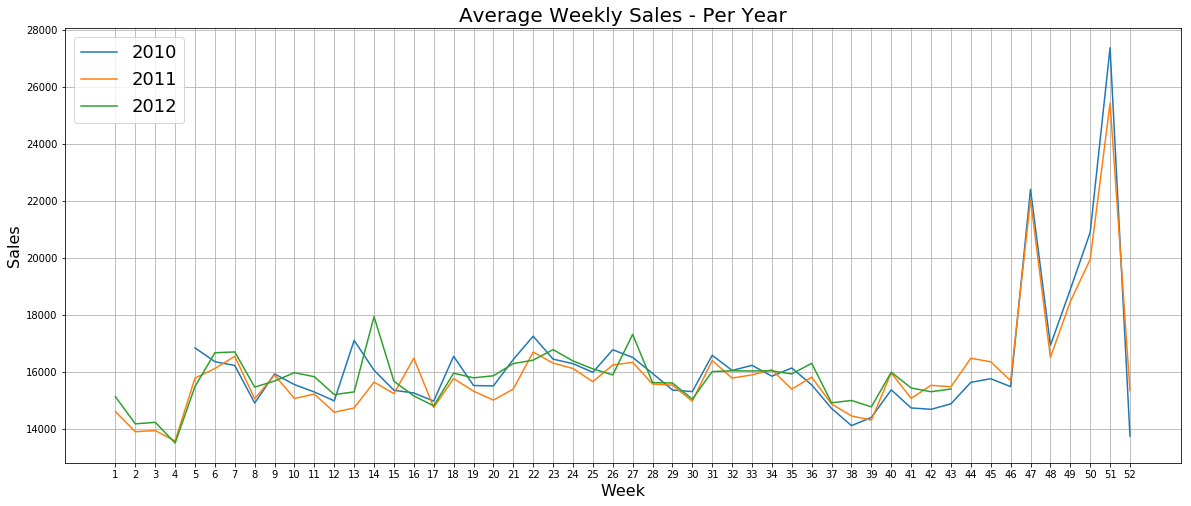

In [20]:
weekly_sales_2010 = data_df[data_df.Year==2010]['Weekly_Sales'].groupby(data_df['Week']).mean()
weekly_sales_2011 = data_df[data_df.Year==2011]['Weekly_Sales'].groupby(data_df['Week']).mean()
weekly_sales_2012 = data_df[data_df.Year==2012]['Weekly_Sales'].groupby(data_df['Week']).mean()


plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)


plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=18)
plt.title('Average Weekly Sales - Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

Từ đồ thị ta thấy doanh thu của các store theo tuần của các năm cho thấy:
- Doanh thu tăng mạnh vào các tuần 46-51, 12-16. cao nhất vào mùa lễ giáng sinh 46-51
- Các tuần 5-7, 22-27, 31-36 có doanh số ổn định và cao
- tuần 12-16 thường liên quan đến ngày lễ tạ ơn, ngày lễ tạ ơn không tổ chức vào ngày cố định, mà mỗi năm khác nhau:
    - năm 2010: tuần 13
    - năm 2011: tuần 16
    - năm 2012: tuần 14

## Mean and Median of weekly sales

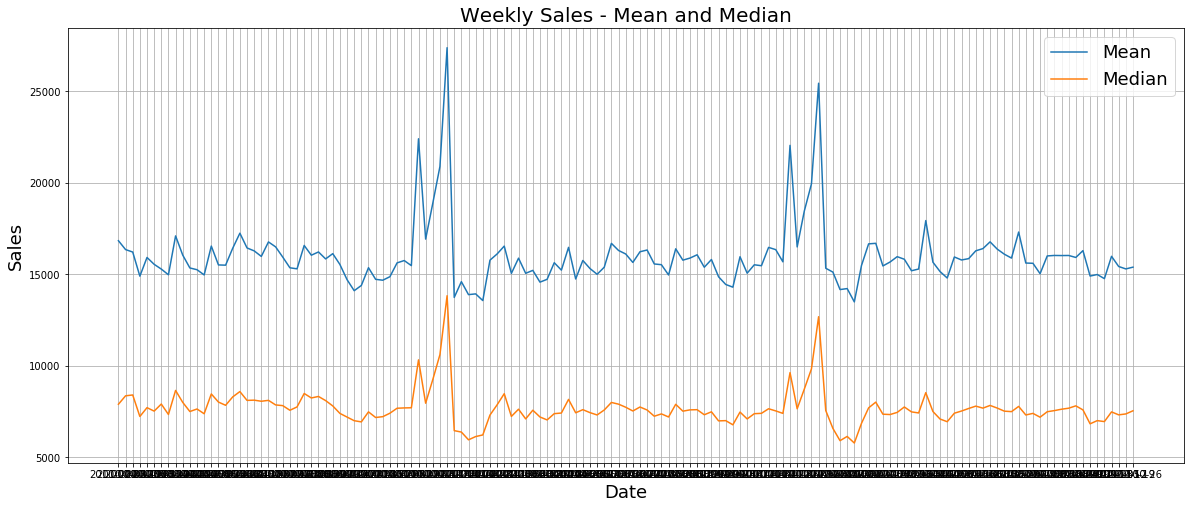

In [21]:
weekly_sales_mean = data_df['Weekly_Sales'].groupby(data_df['Date']).mean()
weekly_sales_median = data_df['Weekly_Sales'].groupby(data_df['Date']).median()

plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_mean.index, weekly_sales_mean.values)
sns.lineplot(weekly_sales_median.index, weekly_sales_median.values)

plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=18)
plt.title('Weekly Sales - Mean and Median', fontsize=20)
plt.ylabel('Sales', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.show()

Đồ thị giá trị trung bình thu nhập và medium thu nhập theo các tuần trong năm thì cho thấy hình dạng đồ thị khá tương đồng như khoảng khác giữa medium và mean thì rất khác nhau, cho thấy doanh thu của các của hàng rất khác nhau cùng một thời điểm, có của hàng bán được rất ít nhưng cũng có của hàng bán được rất nhiều cùng nhiều.

## Average sale of each store

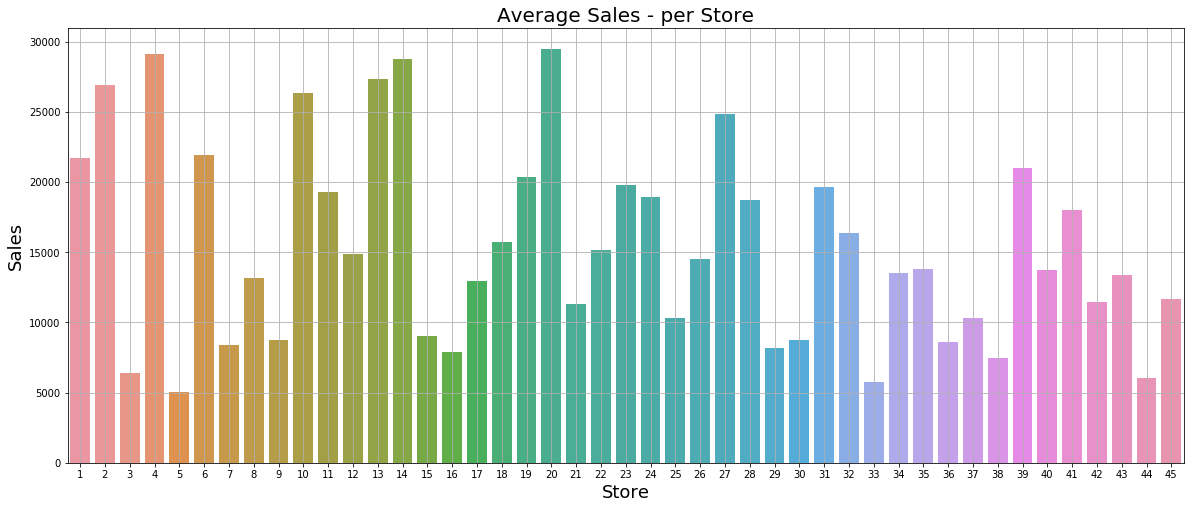

In [22]:
weekly_sales = data_df['Weekly_Sales'].groupby(data_df['Store']).mean()

plt.figure(figsize=(20,8))
sns.barplot(weekly_sales.index, weekly_sales.values)

plt.grid()
plt.title("Average Sales - per Store", fontsize = 20)
plt.ylabel('Sales', fontsize=18)
plt.xlabel("Store", fontsize=18)
plt.show()

## Average sale of each Department

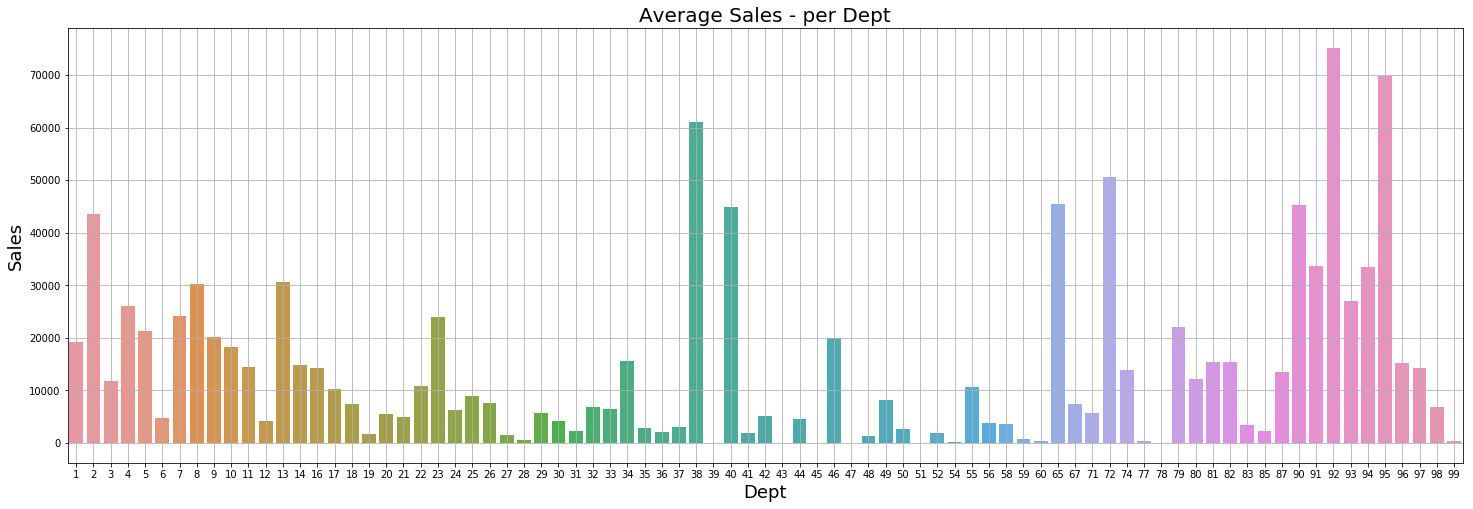

In [23]:
weekly_sales = data_df['Weekly_Sales'].groupby(data_df['Dept']).mean()

plt.figure(figsize=(25,8))
sns.barplot(weekly_sales.index, weekly_sales.values)
plt.grid()
plt.title("Average Sales - per Dept",fontsize=20)
plt.ylabel("Sales", fontsize=18)
plt.xlabel("Dept", fontsize=18)
plt.show()

Qua đồ thị trung bình sale của các store và các department cho thấy doanh thu không phải phân bố đều giữa các của hàng và các department. một số của hàng/department có doanh thu cao hơn hẳn so với các của hàng còn lại.

# Mối tương quan giữa các trường

Sử dụng Pearson correlation để phân tích mối tương quan giữa các feautre và target:

Correlation Metrics:
- 0: không có quan hệ gì
- 0-0.3: có mối quan hệ yếu
- 0.3-0.7: có mối quan hệ vừa phải
- 0.7-1: có mối quan hệ mạnh

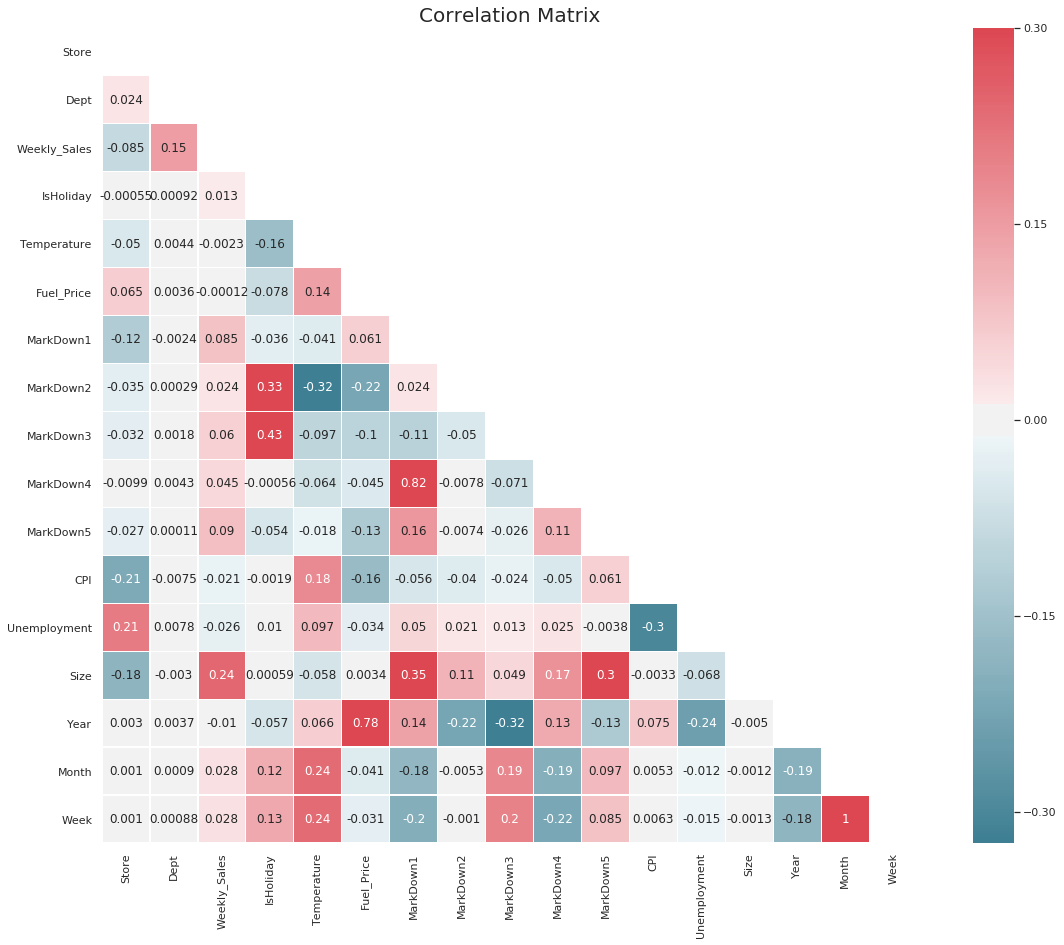

In [24]:
sns.set(style='white')
corr = data_df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
'''
numpy. triu (m, k=0)[source] Upper triangle of an array. 
Return a copy of an array with the elements below the k-th diagonal zeroed.
'''
f, ax = plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title("Correlation Matrix", fontsize=20)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink":1}, annot=True)

plt.show()
# plt.savefig('')


# Phân tích mối liên quan giữa các feature với weakly_sales

## CPI with weekly_sales

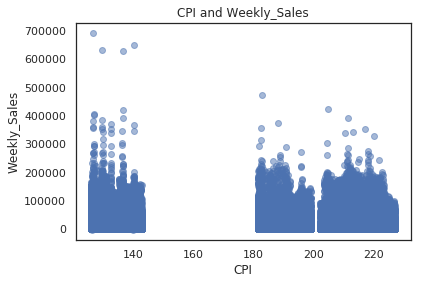

In [25]:
cpi_ws = data_df[data_df['CPI'].isna() == False]

weekly_sales = cpi_ws['Weekly_Sales'].tolist()
cpi = cpi_ws['CPI'].tolist()

plt.scatter(cpi, weekly_sales, c='b', alpha=0.5)
plt.title('CPI and Weekly_Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.show()

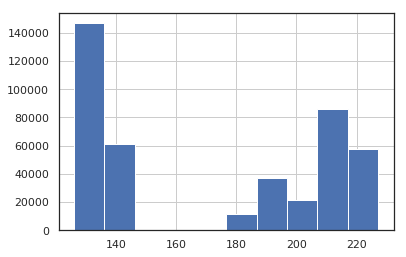

In [26]:
cpi_ws['CPI'].hist()

CPI: "chỉ số tiêu dùng là một chỉ số cơ bản đo lường giá cả hàng hóa dịch vụ và cho biết liệu nền kinh tế có lạc hậu hay không.Chỉ số giá tiêu dùng là một chỉ tiêu tương đối phản ánh xu thế và mức độ biến động của giá bán lẻ hàng hóa tiêu dùng và dịch vụ dùng trong sinh hoạt của dân cư và các hộ gia đình. Bởi vậy nó được dùng để theo dõi sự thay đổi của chi phí sinh hoạt theo thời gian. Khi CPI tăng đồng nghĩa với việc mức giá trung bình tăng và ngược lại.

Sự biến động của CPI có thể gây ra lạm phát hoặc giảm phát từ đó làm suy sụp cả một nền kinh tế. Khi giá cả tăng tới mức không thể kiểm soát nổi thì lạm phát trở thành siêu lam phát"
[link](https://vietnambiz.vn/chi-so-gia-tieu-dung-cpi-la-gi-y-nghia-va-cach-xay-dung-20190806091144265.htm)

Ta thấy chỉ số tiêu dùng bị chia thành 2 khoảng: thứ nhất nằm trong khoảng 140 và thứ 2 từ 180 đến 220, tuy nhiên dù cpi có thấp hay có cao thì doanh thu vẫn phân bố tương tự nhau.
-> cho thấy chỉ số CPI không ảnh hưởng nhiều đến doanh thu của các của hàng.

## Unemployment vs Weekly_Sales

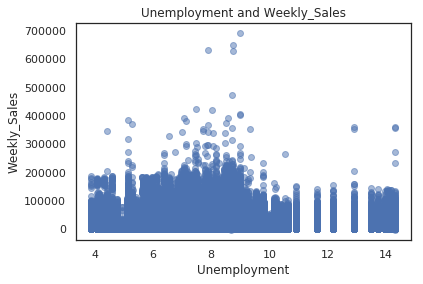

In [38]:
weekly_sales = data_df['Weekly_Sales']
unployment = data_df['Unemployment']
plt.scatter(unployment, weekly_sales, c='b', alpha=0.5)
plt.title('Unemployment and Weekly_Sales')
plt.xlabel('Unemployment')
plt.ylabel('Weekly_Sales')
plt.show()

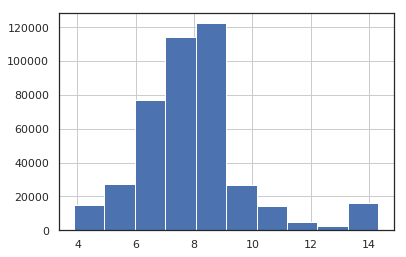

In [39]:
data_df['Unemployment'].hist()

Unemployment: Tỉ lệ thất nhiệp
Ta thấy tỉ lệ thất nghiệp có ảnh hương đôi chút tới doanh thu nhưng không nhiêu.
Với mỗi thời điểm có tỉ lệ thất nghiệp khác nhau nhưng doanh thu vẫn phân bố khá đều. Tại thời điểm có tỉ lệ thất nghiệp trung bình từ 7-9 thì lại thấy xuất hiện một số store/department có doanh thu khá nổi bật.

-> có thể đưa vào để xem xét thêm.

## Holiday vs Weekly_Sales

In [46]:
def make_discrete_plot(df, feature):
    
    fig = plt.figure(figsize=(20,8))
    gs = GridSpec(1,2)
    
    sns.boxplot(y=df.Weekly_Sales, x=df[feature], ax=fig.add_subplot(gs[0,0]))
    
    plt.ylabel('Sales', fontsize=18)
    plt.xlabel(feature, fontsize=18)
    
    sns.stripplot(y=df.Weekly_Sales, x=df[feature], ax=fig.add_subplot(gs[0,1]))
    
    plt.ylabel('Sales', fontsize=18)
    plt.xlabel(feature, fontsize=18)
    fig.show()

/home/tungnk/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


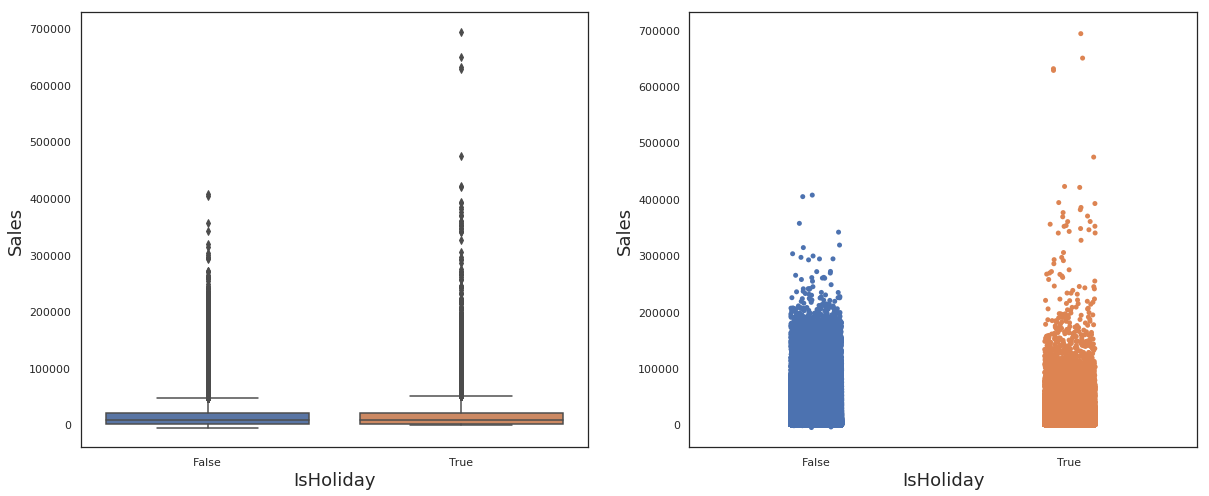

In [47]:
make_discrete_plot(data_df, "IsHoliday")


Ta thấy các đối với cột isholiday=True thì có xuất hiện thêm các các của hàng có có doanh thu lớn. Tuy nhiên không phải có ngày lễ là có doanh thu cao ta cần xem xem theo từng store để biết nhân định rõ hơn.

/home/tungnk/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/tungnk/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/tungnk/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


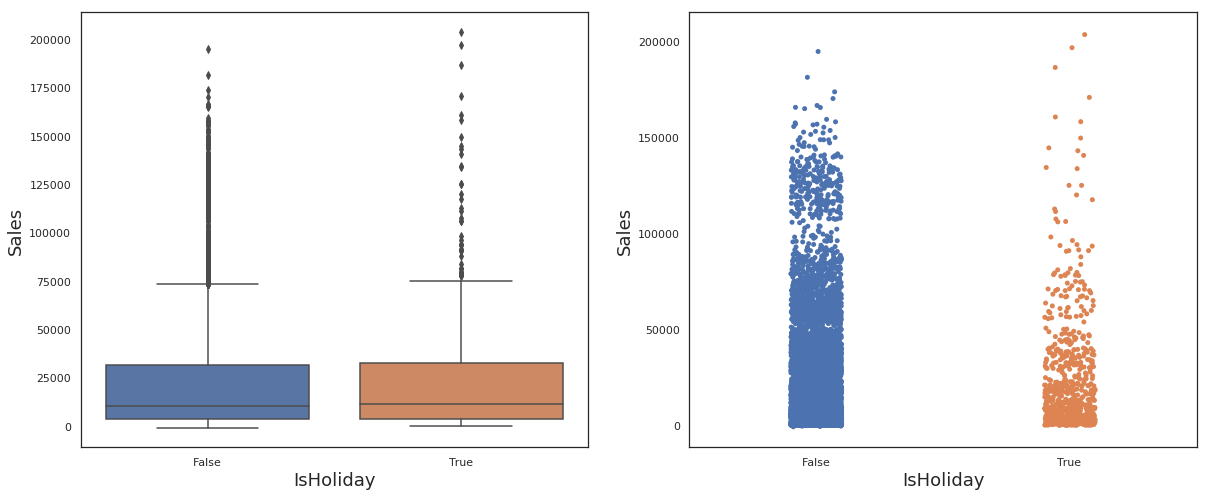

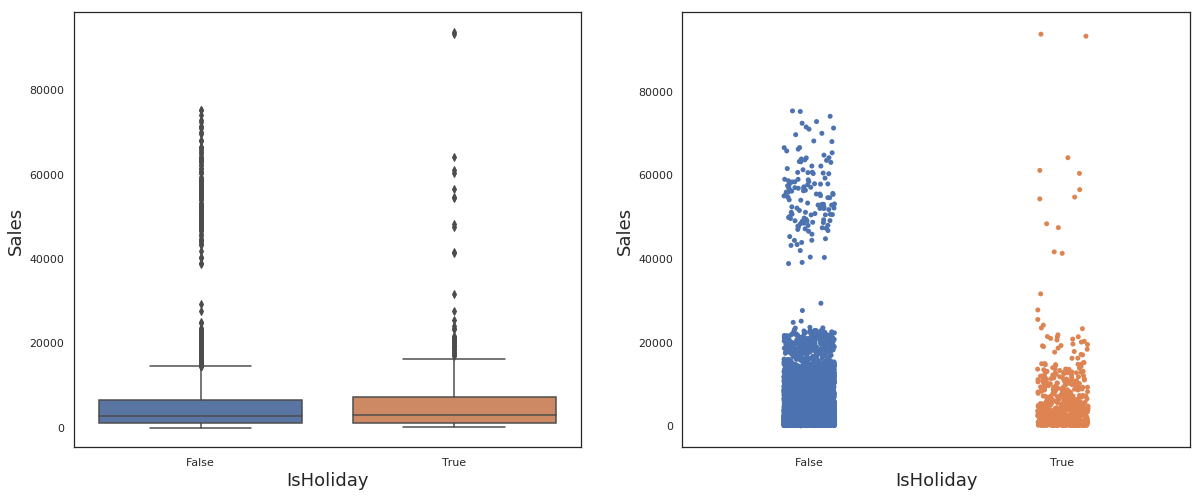

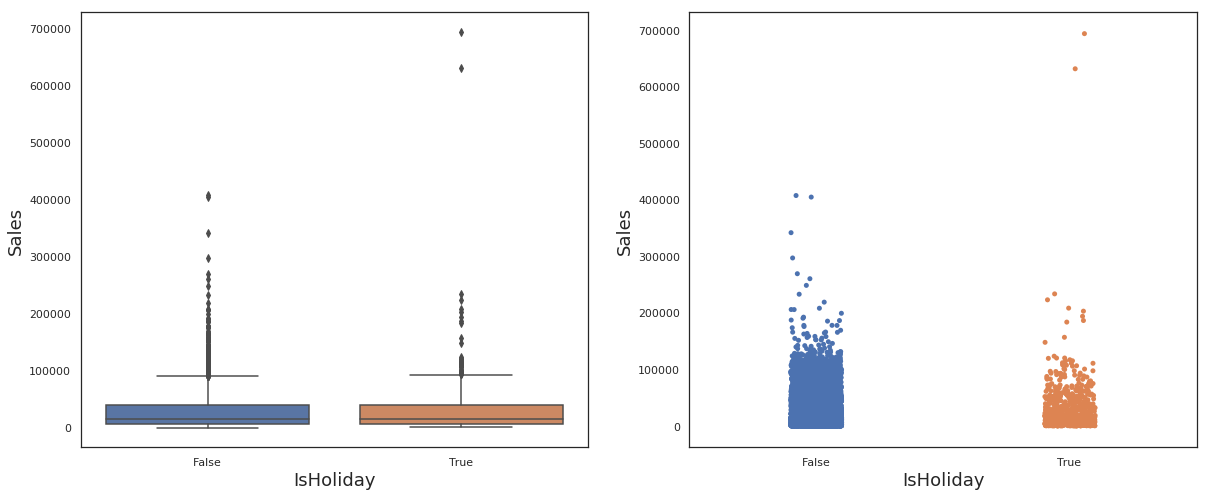

In [56]:
df = data_df[data_df['Store'] == 1]
make_discrete_plot(df, "IsHoliday")
df = data_df[data_df['Store'] == 5]
make_discrete_plot(df, "IsHoliday")
df = data_df[data_df['Store'] == 10]
make_discrete_plot(df, "IsHoliday")


Rõ ràng ta thấy không phải ngày lễ là các store có doanh thu cao hơn, thâm chí một số store còn có doanh thụ thấp hơn. Chúng tỏ mỗi store/department sẽ có một đặc trưng riêng, có store thì vào một số ngày lễ bán được nhiều nhưng một số ngày lễ bán được ít, hoặc ko bán được nhiều trong ngày lễ nhưng ngày thường lại bán được nhiều.

## Tpye of store vs Weekly_Sales

/home/tungnk/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


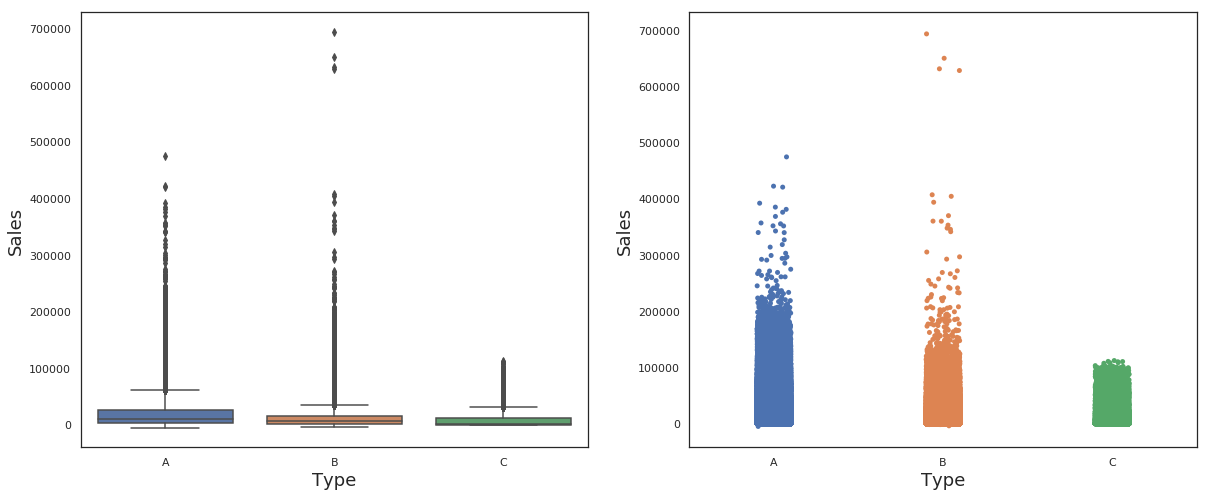

In [59]:
make_discrete_plot(data_df, 'Type')

Khá thụ vị ta thấy có mối quan hệ rõ ràng giữa doanh thu và kiểu của của hàng. Các của hàng có kiểu là A có thường có doanh thu cao, và của khàng có kiểu là C thì có doanh thu ít hơn. 

-> Đây là thuộc tính quan trong cho việc xác đinh doanh thu của của hàng.

## Size of store vs Weekly_Sales

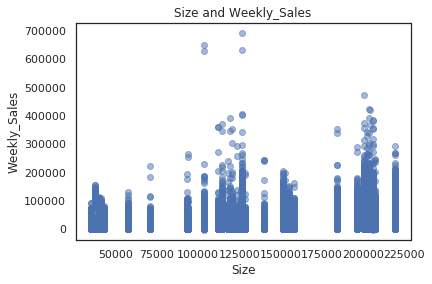

In [61]:
weekly_sales = data_df['Weekly_Sales']
size = data_df['Size']
plt.scatter(size, weekly_sales, c='b', alpha=0.5)
plt.title('Size and Weekly_Sales')
plt.xlabel('Size')
plt.ylabel('Weekly_Sales')
plt.show()

Ta thấy doanh thu của các store cũng ảnh hướng bởi size của store. các store có size nằm trong khoảng 125000 và 20000 thì có nhiều department có doanh thu cao hơn so với các store có size khác.

-> Có thể làm feature để dự đoán

## Markdown vs Weekly_Sales

chỉ xét các sample có markdown khác null

In [68]:
def plot_scatter(df, col='MarkDown1'):
    df = df[df[col].isna() == False]
    weekly_sales = data_df['Weekly_Sales']
    value_cols = data_df[col]
    plt.scatter(value_cols, weekly_sales, c='b', alpha=0.5)
    plt.title(f'{col} and Weekly_Sales')
    plt.xlabel(col)
    plt.ylabel('Weekly_Sales')
    plt.show()

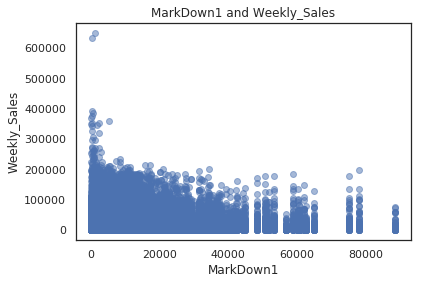

In [69]:
plot_scatter(data_df, col='MarkDown1')

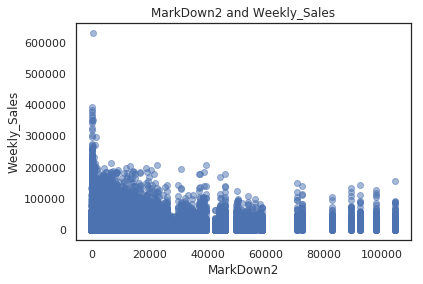

In [71]:
plot_scatter(data_df, col='MarkDown2')

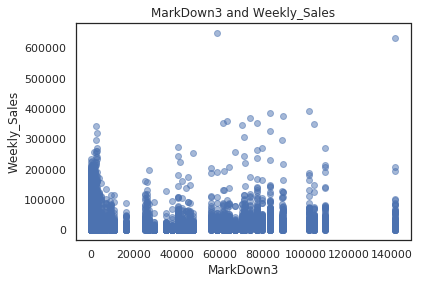

In [72]:
plot_scatter(data_df, col='MarkDown3')

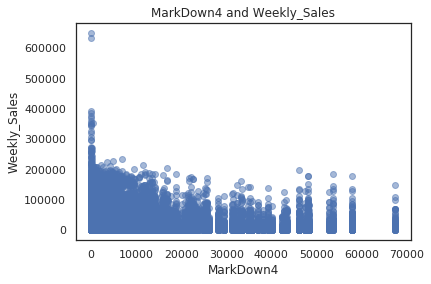

In [73]:
plot_scatter(data_df, col='MarkDown4')

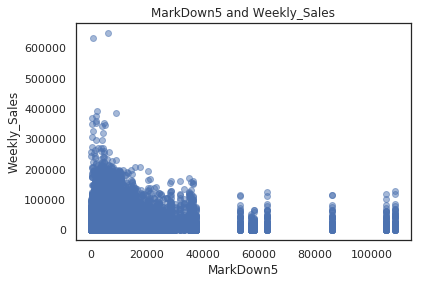

In [74]:
plot_scatter(data_df, col='MarkDown5')

Ta thấy các trường markdown cũng có ảnh hưởng tới doanh thu. các markdown có giá trị nhỏ hơn thì thấy có nhiều store/dept có doanh thu lớn hơn.

Tuy nhiên nhược điểm ta đã phân tích ở trên hầu hết trên 60% đều không có markdown.